 <div style="text-align: center ">Hands on : Social Network Analytics </div>

<div style="text-align: center ">                        Class Tutorial Part 2  </div>
 <div style="text-align: center "> Network Analysis and Mining CSE, 2022) </div>
 
 <div style="text-align: center "> Part 2 of Unit 1 Hands on </div>

 <div style="text-align: center ">  Bhaskarjyoti Das </div>
<div style="text-align: center "> PES University </div>

<div style="text-align: center "> Disclaimer : The material is borrowed, adapted, modified and further developed using various tutorials at Networkx sites and elsewhere </div>



In [1]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
print('NetworkX version: {}'.format(nx.__version__))

NetworkX version: 2.5


# Understand nodes, edges, degree



##  Undirected Graphs

{0: 3, 1: 2, 2: 2, 3: 2, 4: 2, 5: 1}

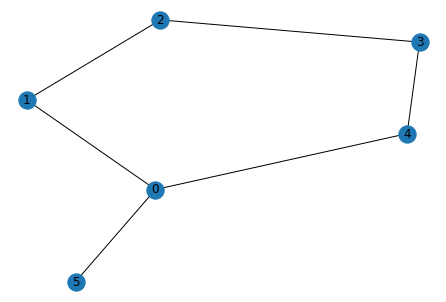

In [2]:
import networkx as nx
G = nx.cycle_graph(5)
G.add_edge(0, 5)
nx.draw(G, pos=nx.fruchterman_reingold_layout(G), with_labels=True)
dict(G.degree())

In [3]:
# You can also get the degree for a single node
G.degree(5)

1

## How to select the node with the greatest degree?

In [4]:
max(G, key=G.degree)

0

## Get the neighbors of a node

In [5]:
# We can get the neighbors of node 0
list(G.neighbors(0))

[1, 4, 5]

In [6]:
# We can also access the neighbors, along with the edge labels (empty in this example)
# using the subscript notation
print(G[0])

{1: {}, 4: {}, 5: {}}


##  Directed Graphs

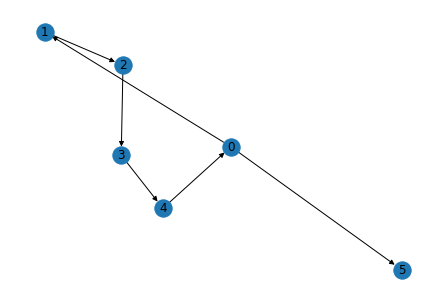

In [7]:
D = nx.cycle_graph(5, create_using=nx.DiGraph())
D.add_edge(0, 5)
nx.draw(D, pos=nx.fruchterman_reingold_layout(D), with_labels=True)

In [8]:
dict(D.in_degree())

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1}

In [9]:
dict(D.out_degree())

{0: 2, 1: 1, 2: 1, 3: 1, 4: 1, 5: 0}

In [10]:
# We can get the successors of a node
list(D.successors(0))

[1, 5]

In [11]:
# And it's predecessors
list(D.predecessors(0))

[4]

In [12]:
# For digraphs the subscript notation yields the successors for a node
print(D[0])

{1: {}, 5: {}}


##  Weighted Graphs and weighted degree

Edges can have attributes, a very common and useful edge attribute is **weight** which is used to model intensity of relations.

The weighted degree of a node is the sum of the weights of its incident edges. 

{(0, 1): Text(-0.5799870411419211, 0.39966590586670364, '1'),
 (0, 4): Text(0.2922588425159459, 0.6967195380597502, '2'),
 (1, 2): Text(-0.6002196848632025, -0.4951587216153098, '3'),
 (2, 3): Text(0.19691316023877564, -0.596385443926454, '4'),
 (3, 4): Text(0.6910347232504019, -0.004841278384690423, '5')}

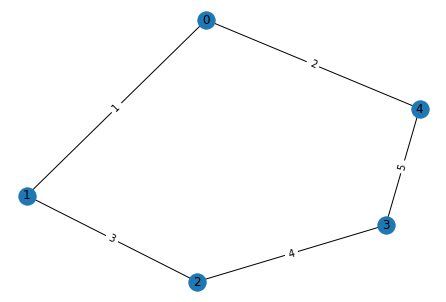

In [13]:
W = nx.cycle_graph(5)
for i, (u, v) in enumerate(W.edges(), 1):
    W[u][v]['weight'] = i
pos = nx.fruchterman_reingold_layout(W)
nx.draw(W, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(W, pos, edge_labels=nx.get_edge_attributes(W, 'weight'))

In [14]:
dict(W.degree())

{0: 2, 1: 2, 2: 2, 3: 2, 4: 2}

In [15]:
dict(W.degree(weight='weight'))

{0: 3, 1: 4, 2: 7, 3: 9, 4: 7}

## How can we get the node with greatest weighted degree using the build-in **max** function?
 

In [16]:
# Or also first computing the weighted degree for all nodes
wdegree = dict(W.degree(weight='weight'))
max(W, key=wdegree.get)

3

# Understand paths, simple paths, and shortest paths

* A **path** is an alternating sequence of distinct nodes and edges in which each edge is incident with its preceding and following nodes. The length of a path is the number of edges it contains. 

* A **simple path** is a path with no repeated nodes. See NetworkX documentation for [simple paths](http://networkx.readthedocs.io/en/stable/reference/algorithms.simple_paths.html).

* The **shortest path** between two nodes is a path with the minimum number of edges. The **distance** between any two nodes $u$ and $v$ of $G$, denoted $d_{G}(u,v)$, is the length of the shortest path between them. See NetworkX documentation for [shortest paths](http://networkx.readthedocs.io/en/stable/reference/algorithms.shortest_paths.html).



## Undirected Graphs

In [17]:
nx.has_path(G, 0, 3)

True

In [18]:
list(nx.all_simple_paths(G, 0, 3))

[[0, 1, 2, 3], [0, 4, 3]]

In [19]:
nx.shortest_path(G, 0, 3)

[0, 4, 3]

In [20]:
nx.shortest_path_length(G, 0, 3)

2

How to obtaing the list of edges of a path from the list of nodes that NetworkX outputs?

In [21]:
path = nx.shortest_path(G, 0, 3)
path_edges = list(zip(path, path[1:]))
print("nodes in path: {}".format(path))
print("edges in path: {}".format(path_edges))

nodes in path: [0, 4, 3]
edges in path: [(0, 4), (4, 3)]


In [22]:
# You can also compute all shortest paths from a single source node
nx.single_source_shortest_path(G, 0)

{0: [0], 1: [0, 1], 4: [0, 4], 5: [0, 5], 2: [0, 1, 2], 3: [0, 4, 3]}

In [23]:
# Or the shortest paths between each pair of nodes
pair=nx.all_pairs_shortest_path(G)

In [24]:
print(*(n for n in pair), sep='\n')

(0, {0: [0], 1: [0, 1], 4: [0, 4], 5: [0, 5], 2: [0, 1, 2], 3: [0, 4, 3]})
(1, {1: [1], 0: [1, 0], 2: [1, 2], 4: [1, 0, 4], 5: [1, 0, 5], 3: [1, 2, 3]})
(2, {2: [2], 1: [2, 1], 3: [2, 3], 0: [2, 1, 0], 4: [2, 3, 4], 5: [2, 1, 0, 5]})
(3, {3: [3], 2: [3, 2], 4: [3, 4], 1: [3, 2, 1], 0: [3, 4, 0], 5: [3, 4, 0, 5]})
(4, {4: [4], 3: [4, 3], 0: [4, 0], 2: [4, 3, 2], 1: [4, 0, 1], 5: [4, 0, 5]})
(5, {5: [5], 0: [5, 0], 1: [5, 0, 1], 4: [5, 0, 4], 2: [5, 0, 1, 2], 3: [5, 0, 4, 3]})


##  Directed Graphs

For directed graphs, paths have to follow the edge directions: 

In [25]:
nx.has_path(D, 0, 3)

True

In [26]:
list(nx.all_simple_paths(D, 0, 3))

[[0, 1, 2, 3]]

In [27]:
nx.shortest_path(D, 0, 3)

[0, 1, 2, 3]

In [28]:
nx.shortest_path_length(D, 0, 3)

3

In [29]:
nx.single_source_shortest_path(D, 0)

{0: [0],
 1: [0, 1],
 5: [0, 5],
 2: [0, 1, 2],
 3: [0, 1, 2, 3],
 4: [0, 1, 2, 3, 4]}

In [30]:
pair=nx.all_pairs_shortest_path(D)

In [31]:
print(*(n for n in pair), sep='\n')

(0, {0: [0], 1: [0, 1], 5: [0, 5], 2: [0, 1, 2], 3: [0, 1, 2, 3], 4: [0, 1, 2, 3, 4]})
(1, {1: [1], 2: [1, 2], 3: [1, 2, 3], 4: [1, 2, 3, 4], 0: [1, 2, 3, 4, 0], 5: [1, 2, 3, 4, 0, 5]})
(2, {2: [2], 3: [2, 3], 4: [2, 3, 4], 0: [2, 3, 4, 0], 1: [2, 3, 4, 0, 1], 5: [2, 3, 4, 0, 5]})
(3, {3: [3], 4: [3, 4], 0: [3, 4, 0], 1: [3, 4, 0, 1], 5: [3, 4, 0, 5], 2: [3, 4, 0, 1, 2]})
(4, {4: [4], 0: [4, 0], 1: [4, 0, 1], 5: [4, 0, 5], 2: [4, 0, 1, 2], 3: [4, 0, 1, 2, 3]})
(5, {5: [5]})


##  Weighted Graphs

For weighted graphs the definition of shortest path considers edge weights; the shprtest path is the path with minium total weight, and the path length is the sum of edge weights. This implies that the shortest weighted path does not necessary has less edges than an alternative path.

For computing weighted shortest paths you have to pass a a keyword argument the name of the edge attribute used as weight:

{('a', 'b'): Text(0.566549910160501, -0.06754747664348373, '0.3'),
 ('a', 'c'): Text(0.13022164583622775, 0.2124325374023246, '2.0'),
 ('b', 'c'): Text(0.30322844400327154, -0.22480465461024918, '0.5'),
 ('c', 'd'): Text(-0.5665499101605009, 0.06754747664348354, '1.0')}

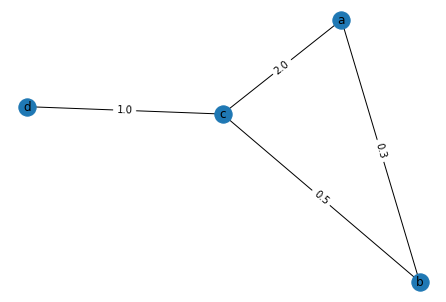

In [32]:
W = nx.Graph()
W.add_edge('a', 'b', weight=0.3)
W.add_edge('b', 'c', weight=0.5)
W.add_edge('a', 'c', weight=2.0)
W.add_edge('c', 'd', weight=1.0)
pos = nx.fruchterman_reingold_layout(W)
nx.draw(W, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(W, pos, edge_labels=nx.get_edge_attributes(W, 'weight'))

In [33]:
nx.shortest_path(W, 'a', 'd')

['a', 'c', 'd']

In [34]:
nx.shortest_path(W, 'a', 'd',weight='weight')

['a', 'b', 'c', 'd']

In [35]:
nx.shortest_path_length(W, 'a', 'd',weight='weight')

1.8

# Node centrality analysis 

NetworkX provides the network of florentine families modeled as an undirected graph:

In [36]:
G = nx.florentine_families_graph()

In [37]:
# Nodes as tuples of nodes and edge attributes
list(G.edges(data=True))

[('Acciaiuoli', 'Medici', {}),
 ('Medici', 'Barbadori', {}),
 ('Medici', 'Ridolfi', {}),
 ('Medici', 'Tornabuoni', {}),
 ('Medici', 'Albizzi', {}),
 ('Medici', 'Salviati', {}),
 ('Castellani', 'Peruzzi', {}),
 ('Castellani', 'Strozzi', {}),
 ('Castellani', 'Barbadori', {}),
 ('Peruzzi', 'Strozzi', {}),
 ('Peruzzi', 'Bischeri', {}),
 ('Strozzi', 'Ridolfi', {}),
 ('Strozzi', 'Bischeri', {}),
 ('Ridolfi', 'Tornabuoni', {}),
 ('Tornabuoni', 'Guadagni', {}),
 ('Albizzi', 'Ginori', {}),
 ('Albizzi', 'Guadagni', {}),
 ('Salviati', 'Pazzi', {}),
 ('Bischeri', 'Guadagni', {}),
 ('Guadagni', 'Lamberteschi', {})]

In [38]:
s='\n The graph details: '
print (s)


a=G.number_of_nodes()
s='\n The no of nodes: ' +repr(a)
######################################################################
#      DETAILS ABOUT THE GRAPH -- this is NOT really analysis
#######################################################################

a=G.number_of_nodes()
s='\n The no of nodes: ' +repr(a)
######################################################################
#      DETAILS ABOUT THE GRAPH -- this is NOT really analysis
#######################################################################

a=G.number_of_nodes()
s='\n The no of nodes: ' +repr(a)
print (s)

a= G.number_of_edges()
s='\n The no of edges: ' +repr(a)
print (s)

deg=nx.degree(G)
a= min(deg)
s='\n The min degree: ' +repr(a)
print (s)

a = max(deg)
s='\n The max degree: ' +repr(a)
print (s)

a= G.number_of_edges()
s='\n The no of edges: ' +repr(a)
print (s)




 The graph details: 

 The no of nodes: 15

 The no of edges: 20

 The min degree: ('Acciaiuoli', 1)

 The max degree: ('Tornabuoni', 3)

 The no of edges: 20


In [39]:
from operator import itemgetter

In [40]:
degc = nx.degree_centrality(G)
# let's list the scores
sorted(degc.items(), key=itemgetter(1), reverse=True)

[('Medici', 0.42857142857142855),
 ('Strozzi', 0.2857142857142857),
 ('Guadagni', 0.2857142857142857),
 ('Castellani', 0.21428571428571427),
 ('Peruzzi', 0.21428571428571427),
 ('Ridolfi', 0.21428571428571427),
 ('Tornabuoni', 0.21428571428571427),
 ('Albizzi', 0.21428571428571427),
 ('Bischeri', 0.21428571428571427),
 ('Barbadori', 0.14285714285714285),
 ('Salviati', 0.14285714285714285),
 ('Acciaiuoli', 0.07142857142857142),
 ('Pazzi', 0.07142857142857142),
 ('Ginori', 0.07142857142857142),
 ('Lamberteschi', 0.07142857142857142)]

## Betweenness centrality

In [41]:
bet = nx.betweenness_centrality(G)
# let's list the scores
sorted(bet.items(), key=itemgetter(1), reverse=True)

[('Medici', 0.521978021978022),
 ('Guadagni', 0.2545787545787546),
 ('Albizzi', 0.21245421245421245),
 ('Salviati', 0.14285714285714288),
 ('Ridolfi', 0.11355311355311355),
 ('Bischeri', 0.1043956043956044),
 ('Strozzi', 0.10256410256410257),
 ('Barbadori', 0.09340659340659341),
 ('Tornabuoni', 0.09157509157509157),
 ('Castellani', 0.05494505494505495),
 ('Peruzzi', 0.02197802197802198),
 ('Acciaiuoli', 0.0),
 ('Pazzi', 0.0),
 ('Ginori', 0.0),
 ('Lamberteschi', 0.0)]

##  Closeness centrality

In [42]:
clos = nx.closeness_centrality(G)
# let's list the scores
sorted(clos.items(), key=itemgetter(1), reverse=True)

[('Medici', 0.56),
 ('Ridolfi', 0.5),
 ('Tornabuoni', 0.4827586206896552),
 ('Albizzi', 0.4827586206896552),
 ('Guadagni', 0.4666666666666667),
 ('Strozzi', 0.4375),
 ('Barbadori', 0.4375),
 ('Bischeri', 0.4),
 ('Castellani', 0.3888888888888889),
 ('Salviati', 0.3888888888888889),
 ('Acciaiuoli', 0.3684210526315789),
 ('Peruzzi', 0.3684210526315789),
 ('Ginori', 0.3333333333333333),
 ('Lamberteschi', 0.32558139534883723),
 ('Pazzi', 0.2857142857142857)]

##  Eigenvector Centrality

In [43]:
eig = nx.eigenvector_centrality(G)
# let's list the scores
sorted(eig.items(), key=itemgetter(1), reverse=True)

[('Medici', 0.4303154258349923),
 ('Strozzi', 0.3559730326460451),
 ('Ridolfi', 0.3415544259074365),
 ('Tornabuoni', 0.325846704169574),
 ('Guadagni', 0.2891171573226501),
 ('Bischeri', 0.2827943958713356),
 ('Peruzzi', 0.2757224374104833),
 ('Castellani', 0.2590200378423514),
 ('Albizzi', 0.2439605296754477),
 ('Barbadori', 0.2117057470647985),
 ('Salviati', 0.14592084164171834),
 ('Acciaiuoli', 0.1321573195285342),
 ('Lamberteschi', 0.08879253113499548),
 ('Ginori', 0.0749245316027793),
 ('Pazzi', 0.044814939703863084)]

##  Comparing centrality measures 

In [44]:
import pandas as pd
import seaborn as sns
centrality_measures = {
    'degree': degc,
    'betweenness': bet,
    'closeness': clos,
    'eigenvector': eig,
}
centrality = pd.DataFrame(centrality_measures)
centrality

,degree,betweenness,closeness,eigenvector
Acciaiuoli,0.071429,0.000000,0.368421,0.132157
Medici,0.428571,0.521978,0.560000,0.430315
Castellani,0.214286,0.054945,0.388889,0.259020
Peruzzi,0.214286,0.021978,0.368421,0.275722
Strozzi,0.285714,0.102564,0.437500,0.355973
Barbadori,0.142857,0.093407,0.437500,0.211706
Ridolfi,0.214286,0.113553,0.500000,0.341554
Tornabuoni,0.214286,0.091575,0.482759,0.325847
Albizzi,0.214286,0.212454,0.482759,0.243961
Salviati,0.142857,0.142857,0.388889,0.145921


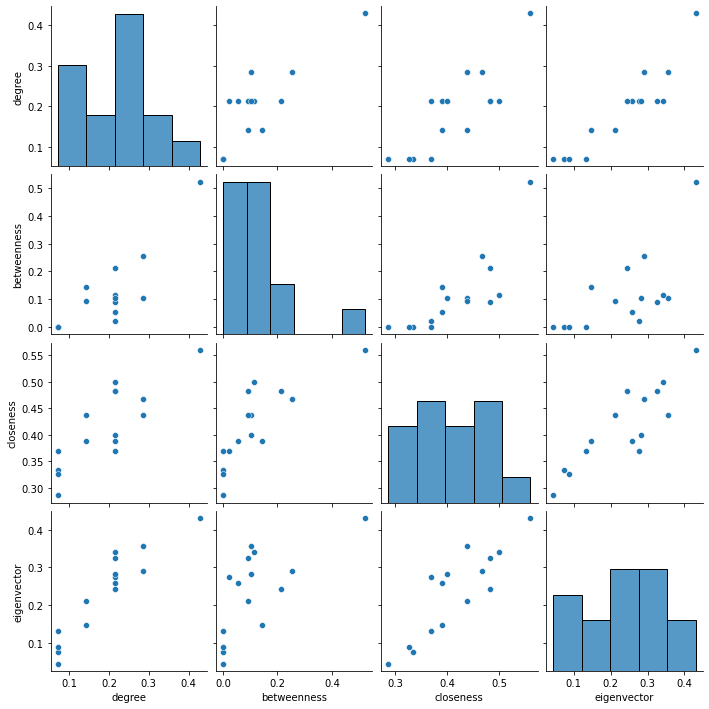

In [45]:
sns.pairplot(centrality)

## Edge betweenness centrality of edges

Same as betweenness for node but we are just considering edges


In [46]:
ebc=nx.edge_betweenness_centrality(G, normalized=True, weight=None)
ebl=sorted(ebc.items(),
       key=lambda i: i[1],
       reverse=True)[:5]
s='\n Top 5 edge betweenness centrality   :\n'
print (s)
for item in ebl:
    s= repr(item) + ','
    print (s)



 Top 5 edge betweenness centrality   :

(('Medici', 'Salviati'), 0.24761904761904763),
(('Medici', 'Albizzi'), 0.21269841269841266),
(('Medici', 'Barbadori'), 0.1761904761904762),
(('Bischeri', 'Guadagni'), 0.1634920634920635),
(('Albizzi', 'Guadagni'), 0.15555555555555559),


##  PageRank centrality 

In [47]:
from operator import itemgetter
s='\n sorted pagerank:\n'
print (s)
pgr=nx.pagerank(G)
print (sorted(pgr.items(), key=itemgetter(1), reverse=True))



 sorted pagerank:

[('Medici', 0.14581844065218275), ('Guadagni', 0.09839859717156552), ('Strozzi', 0.08809849082725613), ('Albizzi', 0.079121502380729), ('Tornabuoni', 0.07127928374676082), ('Ridolfi', 0.069574170990148), ('Castellani', 0.06933028447008721), ('Bischeri', 0.0688615381141211), ('Peruzzi', 0.06787531774407572), ('Salviati', 0.061302640987807314), ('Barbadori', 0.050300712744633685), ('Pazzi', 0.036054222996734095), ('Ginori', 0.032418257716596434), ('Lamberteschi', 0.03090932465499793), ('Acciaiuoli', 0.03065721480230426)]


## Harmonic Closeness Centrality

In [48]:
har = nx.harmonic_centrality(G)
s='\n sorted Harmonic Centrality :\n'
print (s)

print (sorted(har.items(), key=itemgetter(1), reverse=True))




 sorted Harmonic Centrality :

[('Medici', 9.500000000000002), ('Guadagni', 8.083333333333332), ('Ridolfi', 7.999999999999999), ('Strozzi', 7.833333333333332), ('Tornabuoni', 7.833333333333332), ('Albizzi', 7.833333333333332), ('Bischeri', 7.199999999999999), ('Barbadori', 7.083333333333332), ('Castellani', 6.916666666666665), ('Peruzzi', 6.783333333333332), ('Salviati', 6.583333333333332), ('Acciaiuoli', 5.916666666666666), ('Lamberteschi', 5.366666666666667), ('Ginori', 5.333333333333334), ('Pazzi', 4.7666666666666675)]


# Exercise - illustrate paths in the Florentine families graph

Shortest paths are not unique, we can have more of one path with the same length. You can use **nx.all_shortest_paths** to get all shortest paths.

In [49]:
G = nx.florentine_families_graph()


In [50]:
# also save the graph data for possible analysis by Gephi
nx.write_gexf(G, "florentine.gexf")
#This does NOT support mixed mode graph ( directed and undirected)

In [51]:
pos_spring = nx.spring_layout(G)
pos_fr = nx.fruchterman_reingold_layout(G)
pos_fr

{'Acciaiuoli': array([ 0.20049072, -0.52321373]),
 'Medici': array([ 0.04687286, -0.1943993 ]),
 'Castellani': array([-0.32112892,  0.56078986]),
 'Peruzzi': array([-0.20655128,  0.77068858]),
 'Strozzi': array([-0.02822474,  0.61568396]),
 'Barbadori': array([-0.25771298,  0.16995615]),
 'Ridolfi': array([0.1375016 , 0.24448757]),
 'Tornabuoni': array([0.20077782, 0.03201663]),
 'Albizzi': array([ 0.35549067, -0.16751419]),
 'Salviati': array([-0.11126536, -0.65587679]),
 'Pazzi': array([-0.21341264, -1.        ]),
 'Bischeri': array([-0.10932652,  0.46705096]),
 'Guadagni': array([-0.0264472 ,  0.05303905]),
 'Ginori': array([ 0.72212346, -0.27528054]),
 'Lamberteschi': array([-0.38918748, -0.0974282 ])}

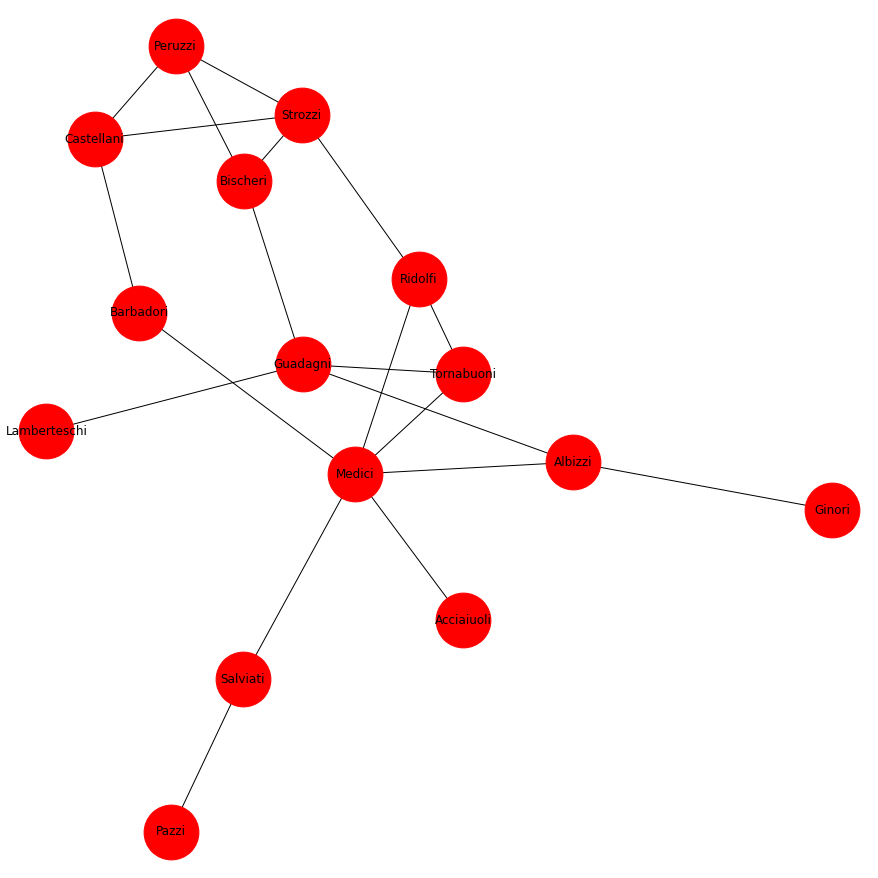

In [52]:
plt.figure(figsize=(12,12))
nx.draw(G, pos=pos_fr, node_size=3000, node_color='red', with_labels=True)

In [53]:
source = 'Medici'
target = 'Peruzzi'
nx.shortest_path(G, source, target)

['Medici', 'Barbadori', 'Castellani', 'Peruzzi']

In [54]:
# Shortest paths are not unique
list(nx.all_shortest_paths(G, source, target))

[['Medici', 'Barbadori', 'Castellani', 'Peruzzi'],
 ['Medici', 'Ridolfi', 'Strozzi', 'Peruzzi']]

In [55]:
def plot_paths(G, paths):
    plt.figure(figsize=(12,12))
    pos = nx.fruchterman_reingold_layout(G)
    nx.draw_networkx_nodes(G, pos=pos, node_size=3000, node_color='yellow')
    nx.draw_networkx_labels(G, pos=pos, labels={n: n for n in G})
    # Draw edges
    nx.draw_networkx_edges(G, pos=pos)
    for path in paths:
        edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color='red', width=3)
    ax = plt.gca()
    ax.set_axis_off()
    ax.grid(None)

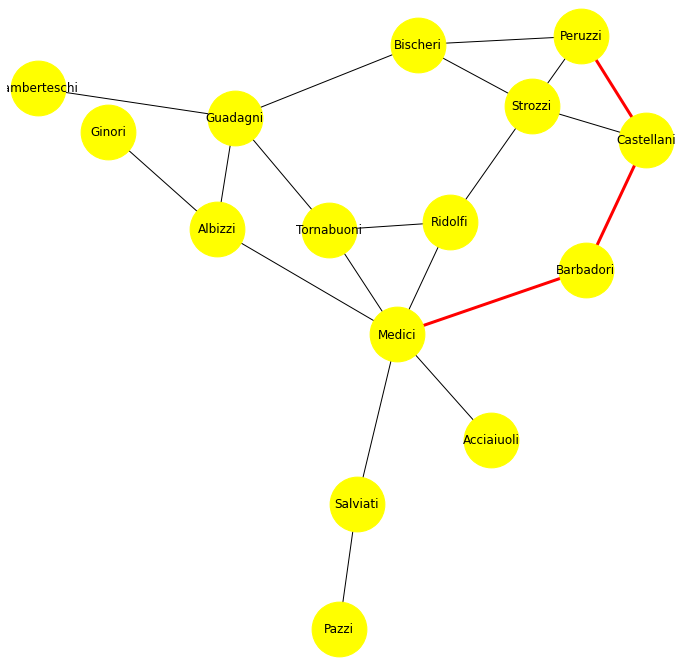

In [56]:
plot_paths(G, [nx.shortest_path(G, source, target)])

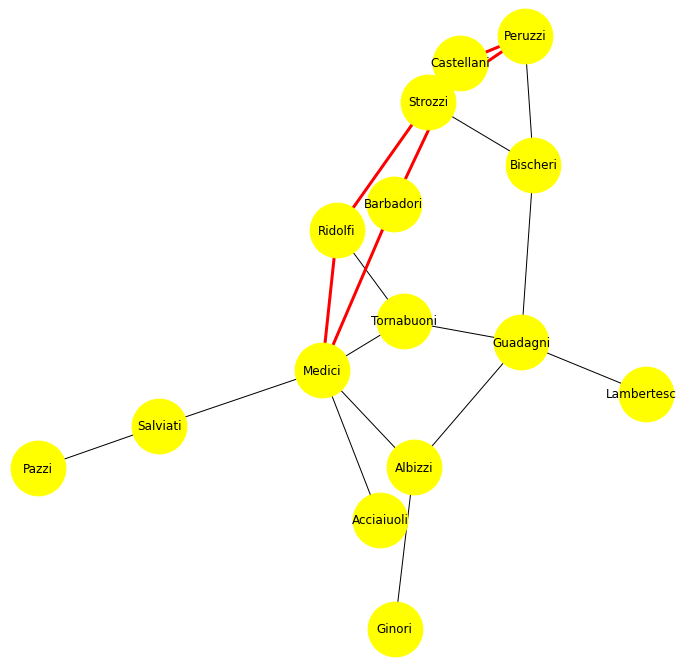

In [57]:
plot_paths(G, nx.all_shortest_paths(G, source, target))

In [58]:
for i, path in enumerate(nx.all_simple_paths(G, source, target), 1):
    print(i, path)

1 ['Medici', 'Barbadori', 'Castellani', 'Peruzzi']
2 ['Medici', 'Barbadori', 'Castellani', 'Strozzi', 'Peruzzi']
3 ['Medici', 'Barbadori', 'Castellani', 'Strozzi', 'Ridolfi', 'Tornabuoni', 'Guadagni', 'Bischeri', 'Peruzzi']
4 ['Medici', 'Barbadori', 'Castellani', 'Strozzi', 'Bischeri', 'Peruzzi']
5 ['Medici', 'Ridolfi', 'Strozzi', 'Castellani', 'Peruzzi']
6 ['Medici', 'Ridolfi', 'Strozzi', 'Peruzzi']
7 ['Medici', 'Ridolfi', 'Strozzi', 'Bischeri', 'Peruzzi']
8 ['Medici', 'Ridolfi', 'Tornabuoni', 'Guadagni', 'Bischeri', 'Peruzzi']
9 ['Medici', 'Ridolfi', 'Tornabuoni', 'Guadagni', 'Bischeri', 'Strozzi', 'Castellani', 'Peruzzi']
10 ['Medici', 'Ridolfi', 'Tornabuoni', 'Guadagni', 'Bischeri', 'Strozzi', 'Peruzzi']
11 ['Medici', 'Tornabuoni', 'Ridolfi', 'Strozzi', 'Castellani', 'Peruzzi']
12 ['Medici', 'Tornabuoni', 'Ridolfi', 'Strozzi', 'Peruzzi']
13 ['Medici', 'Tornabuoni', 'Ridolfi', 'Strozzi', 'Bischeri', 'Peruzzi']
14 ['Medici', 'Tornabuoni', 'Guadagni', 'Bischeri', 'Peruzzi']
15 ['Medic

In [59]:
for i, path in enumerate(nx.shortest_simple_paths(G, source, target), 1):
    print(i, path)

1 ['Medici', 'Barbadori', 'Castellani', 'Peruzzi']
2 ['Medici', 'Ridolfi', 'Strozzi', 'Peruzzi']
3 ['Medici', 'Barbadori', 'Castellani', 'Strozzi', 'Peruzzi']
4 ['Medici', 'Tornabuoni', 'Ridolfi', 'Strozzi', 'Peruzzi']
5 ['Medici', 'Ridolfi', 'Strozzi', 'Castellani', 'Peruzzi']
6 ['Medici', 'Albizzi', 'Guadagni', 'Bischeri', 'Peruzzi']
7 ['Medici', 'Tornabuoni', 'Guadagni', 'Bischeri', 'Peruzzi']
8 ['Medici', 'Ridolfi', 'Strozzi', 'Bischeri', 'Peruzzi']
9 ['Medici', 'Ridolfi', 'Tornabuoni', 'Guadagni', 'Bischeri', 'Peruzzi']
10 ['Medici', 'Barbadori', 'Castellani', 'Strozzi', 'Bischeri', 'Peruzzi']
11 ['Medici', 'Tornabuoni', 'Ridolfi', 'Strozzi', 'Castellani', 'Peruzzi']
12 ['Medici', 'Albizzi', 'Guadagni', 'Bischeri', 'Strozzi', 'Peruzzi']
13 ['Medici', 'Tornabuoni', 'Guadagni', 'Bischeri', 'Strozzi', 'Peruzzi']
14 ['Medici', 'Tornabuoni', 'Ridolfi', 'Strozzi', 'Bischeri', 'Peruzzi']
15 ['Medici', 'Albizzi', 'Guadagni', 'Tornabuoni', 'Ridolfi', 'Strozzi', 'Peruzzi']
16 ['Medici', 'Ri

# Exercise : degree distribution


In [60]:
N,K = G.order(), G.size()
avg_deg = float(K)/N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)


Nodes:  15
Edges:  20
Average degree:  1.3333333333333333


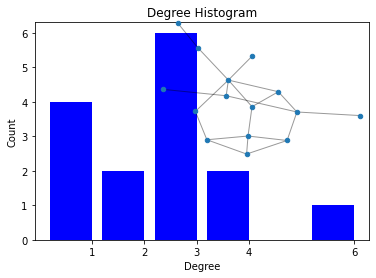

In [64]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
A = (G.subgraph(c) for c in nx.connected_components(G))
# = list(A)[0]
Gcc = sorted(A, key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

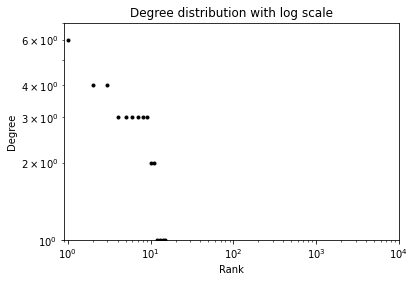

In [65]:
########################################################################
# Degree distribution 
########################################################################

degrees = G.degree()
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence

# loglog tells matplotlib to use log scales.
# The x values, range(1,10001), are the ranks, 
# and the degree_sequence are the y values.
# The String 'k.' means use black (k) dots (.)
'''
Now we need to do some plotting. Plotting using matplotlib is a lot like 
plotting using MATLAB. Because the degree distribution of a BA graph is a 
power-law, we'd like to use a plot with log scales. Here is how we'd do it.

'''
plt.loglog(range(1,G.order()+1),degree_sequence,'k.')
plt.title("Degree distribution with log scale")
plt.xlabel('Rank')
plt.ylabel('Degree')
plt.ylim(1,max(degree_sequence)+1)
plt.xlim(.9,10001)
plt.savefig("degree_distribution.png")

# Exercise :  Centrality Scatter plot 

In [66]:
#Centrality scatter plot 
def centrality_scatter(dict1,dict2,path="",ylab="",xlab="",title="",line=False):
    # Create figure and drawing axis
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(111)
    # Create items and extract centralities
    items1 = sorted(dict1.items())
    items2 = sorted(dict2.items())
    xdata=[b for a,b in items1]
    ydata=[b for a,b in items2]
    # Add each actor to the plot by ID
    for p in range(len(items1)):
        ax1.text(x=xdata[p], y=ydata[p],s=str(items1[p][0]), color="b")
        if line:
            # use NumPy to calculate the best fit
            slope, yint = plt.polyfit(xdata,ydata,1)
            xline = plt.xticks()[0]
            yline = map(lambda x: slope*x+yint,xline)
            ax1.plot(xline,yline,ls='--',color='b')
        # Set new x- and y-axis limits
    plt.xlim((0.0,max(xdata)+(.15*max(xdata))))
    plt.ylim((0.0,max(ydata)+(.15*max(ydata))))
    # Add labels and save
    ax1.set_title(title)
    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab)
    plt.savefig(path)    


In [67]:
cc=nx.closeness_centrality(G)
dc=nx.degree_centrality(G)
bc = nx.betweenness_centrality(G)
ec = nx.eigenvector_centrality(G,max_iter=1000)

sorted_dc=sorted(dc.items())
sorted_bc=sorted(bc.items())
sorted_cc=sorted(cc.items())
sorted_ec=sorted(ec.items())

#extract the centralities
deg_data=[y for x,y in sorted_dc]
close_data=[y for x,y in sorted_cc]
betw_data=[y for x,y in sorted_bc]
eig_data=[y for x,y in sorted_ec]



In [68]:
from scipy.stats.stats import pearsonr

r1=pearsonr(deg_data,betw_data)
s= "\n Pearson Correlation Coeff deg and betweenness: " + repr(r1)
print (s)

r2=pearsonr(deg_data,close_data)
s= "\n Pearson Correlation Coeff deg and closeness: " + repr(r2)
print (s)


r3=pearsonr(betw_data,close_data)
s= "\n Pearson Correlation Coeff betweennness and closeness: " + repr(r3)
print (s)

r4=pearsonr(betw_data,eig_data)
s= "\n Pearson Correlation Coeff betweennness and eigenvector : " + repr(r4)
print (s)




 Pearson Correlation Coeff deg and betweenness: (0.8441513289848926, 7.575095714865155e-05)

 Pearson Correlation Coeff deg and closeness: (0.8245138298922935, 0.00015582981906258532)

 Pearson Correlation Coeff betweennness and closeness: (0.8066296471635478, 0.0002796697223251082)

 Pearson Correlation Coeff betweennness and eigenvector : (0.6655010682819833, 0.006772196960711754)


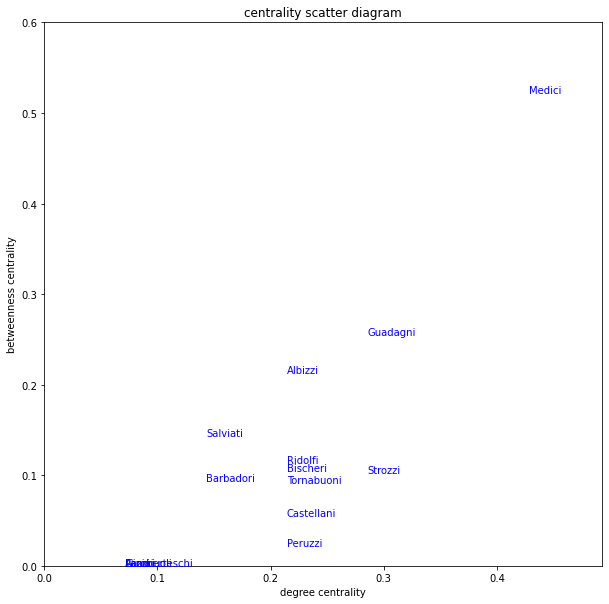

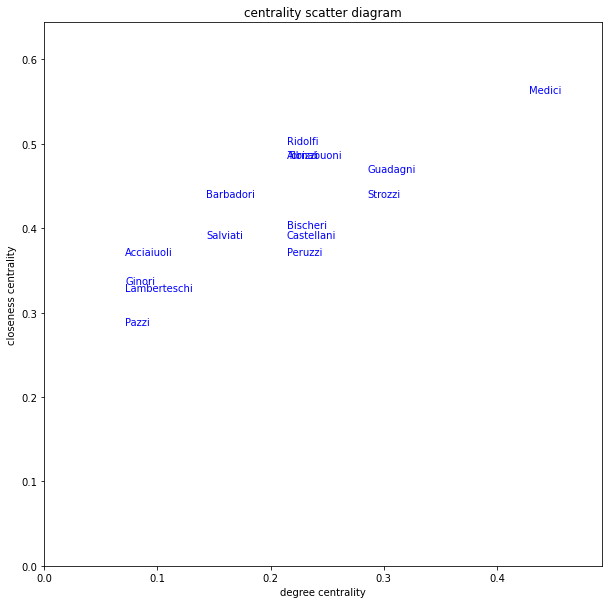

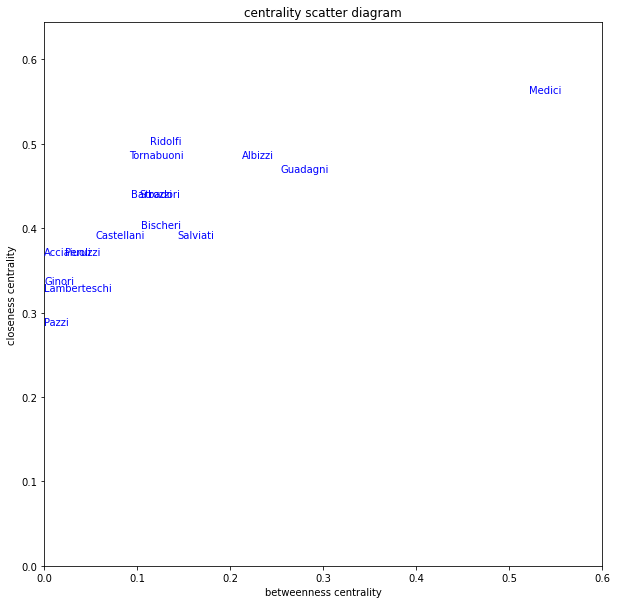

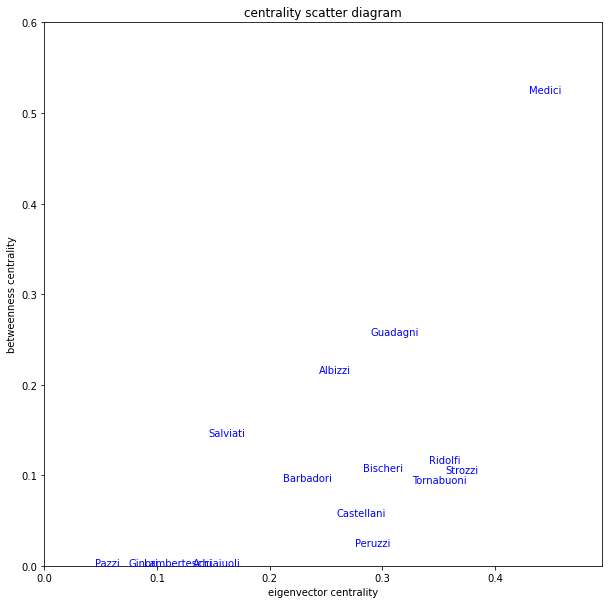

In [69]:
##########################
# Draw centrality scatter 
centrality_scatter(dc,bc,path="cum18bcdc",ylab="betweenness centrality",xlab="degree centrality",title="centrality scatter diagram",line=False)
centrality_scatter(dc,cc,path="cum18ccdc",ylab="closeness centrality",xlab="degree centrality",title="centrality scatter diagram",line=False)
centrality_scatter(bc,cc,path="cum18ccbc",ylab="closeness centrality",xlab="betweenness centrality",title="centrality scatter diagram",line=False)
centrality_scatter(ec,bc,path="cum18bcec",ylab="betweenness centrality",xlab="eigenvector centrality",title="centrality scatter diagram",line=False)


# Exercise :  Find Specific Ego Network 

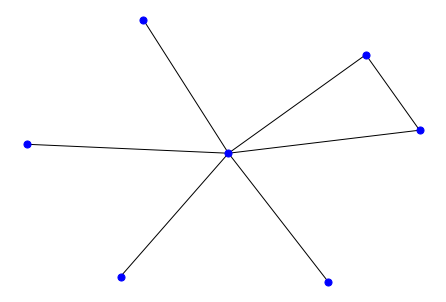

In [70]:
s='Medici'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=False)
# Draw ego as large and red
#nx.draw_networkx_nodes(hub_ego,pos,with_labels = True,nodelist=[largest_hub],node_size=300,node_color='r')
plt.savefig('Medici.png')
plt.show()
nx.write_gml(hub_ego,"egonw_medici.gml")



In [71]:
no_node=len(hub_ego.nodes())
no_edges=len(hub_ego.edges())
print("Medici's Ego Network : nodes", no_node)
print("Medici's Ego Network : edges", no_edges)

Medici's Ego Network : nodes 7
Medici's Ego Network : edges 7
